In [774]:
#Import Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [635]:
# Loading the file

boom_bike=pd.read_csv('day.csv')

In [636]:
boom_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [637]:
boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [638]:
#So we got that we didn't have any null values out of 730 rows.

boom_bike.shape

(730, 16)

In [639]:
boom_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [640]:
boom_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [641]:
boom_bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [642]:
##Dropping unnecessary columns which is redundant or of no use.

boom_bike = boom_bike.drop(columns=['instant','dteday','casual','registered'],axis=1)
boom_bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

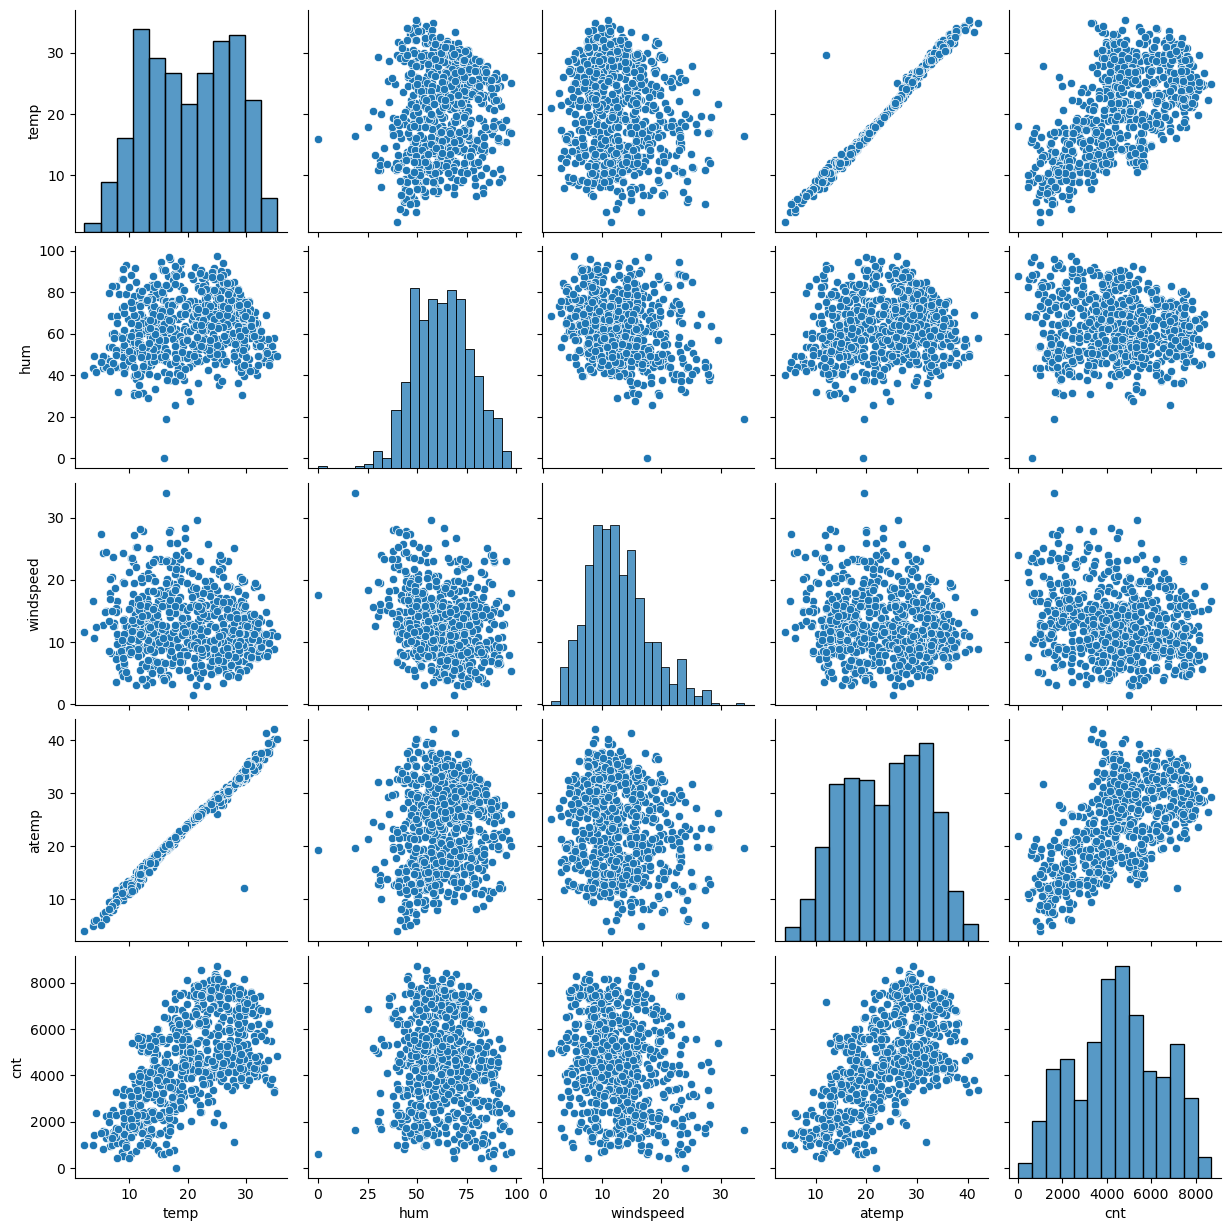

In [643]:
#visualizing the numeric variables of the dataset using pairplot 

sns.pairplot(boom_bike, vars=["temp", "hum",'windspeed','atemp','cnt'])
plt.show()

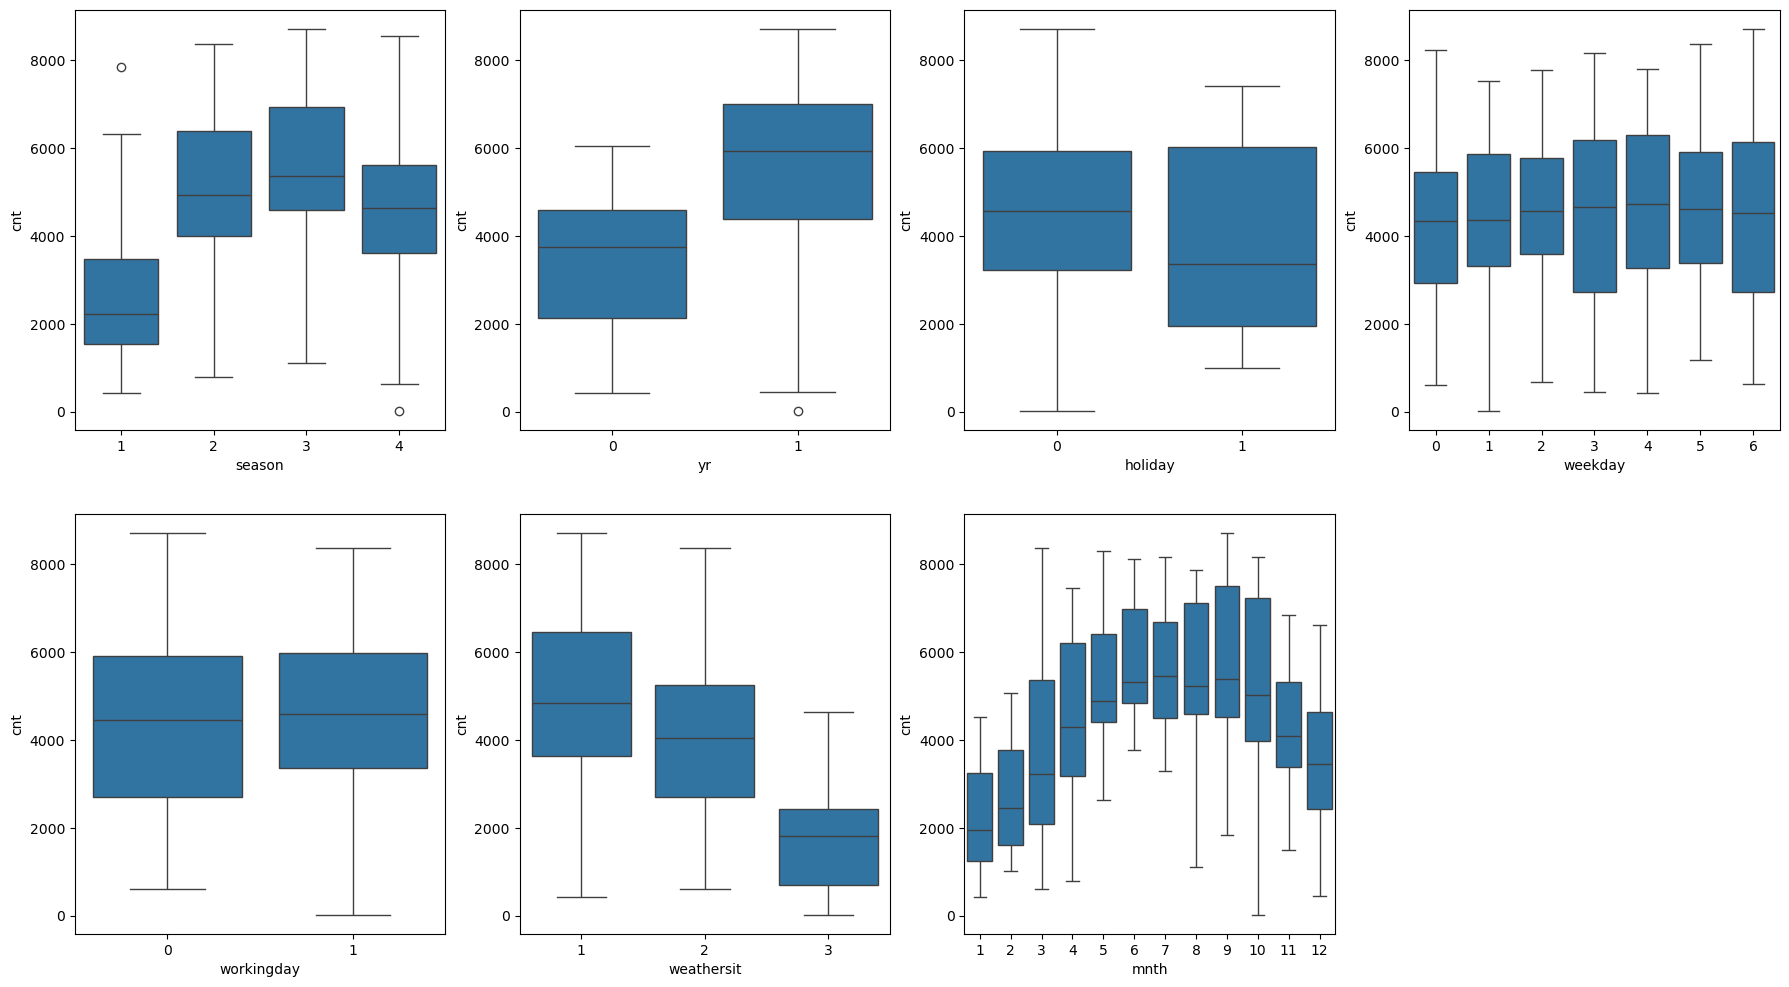

In [644]:
#Vizualizing the categorical variables with target variable as 'cnt' using boxplot.

plt.figure(figsize=(22, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = boom_bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = boom_bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = boom_bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = boom_bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = boom_bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boom_bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = boom_bike)
plt.show()

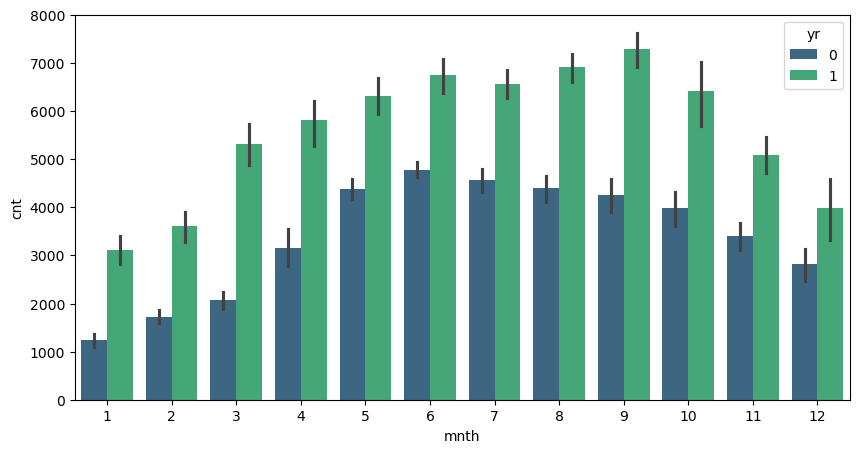

In [645]:
#Relation between month and cnt
plt.figure(figsize=(10,5))
sns.barplot(boom_bike,x='mnth',y='cnt',hue='yr',palette='viridis')
plt.show()


In [646]:
# Conclusions:

##Fall season:-shows that the demand was high during this season.And mokre no of users are rented during this period of time.
##The year 2019 had a higher count of users as compared to the year 2018
##The bike rented more on Saturday, Wednesday and Thursday.
##There is no much impact of workingday.
##The total no of users is high for clear weather i.e b\w 3800 to 6200 during clear weather
##There are no users when there is heavy rain/ snow 
##The count is highest in the month of September,October.


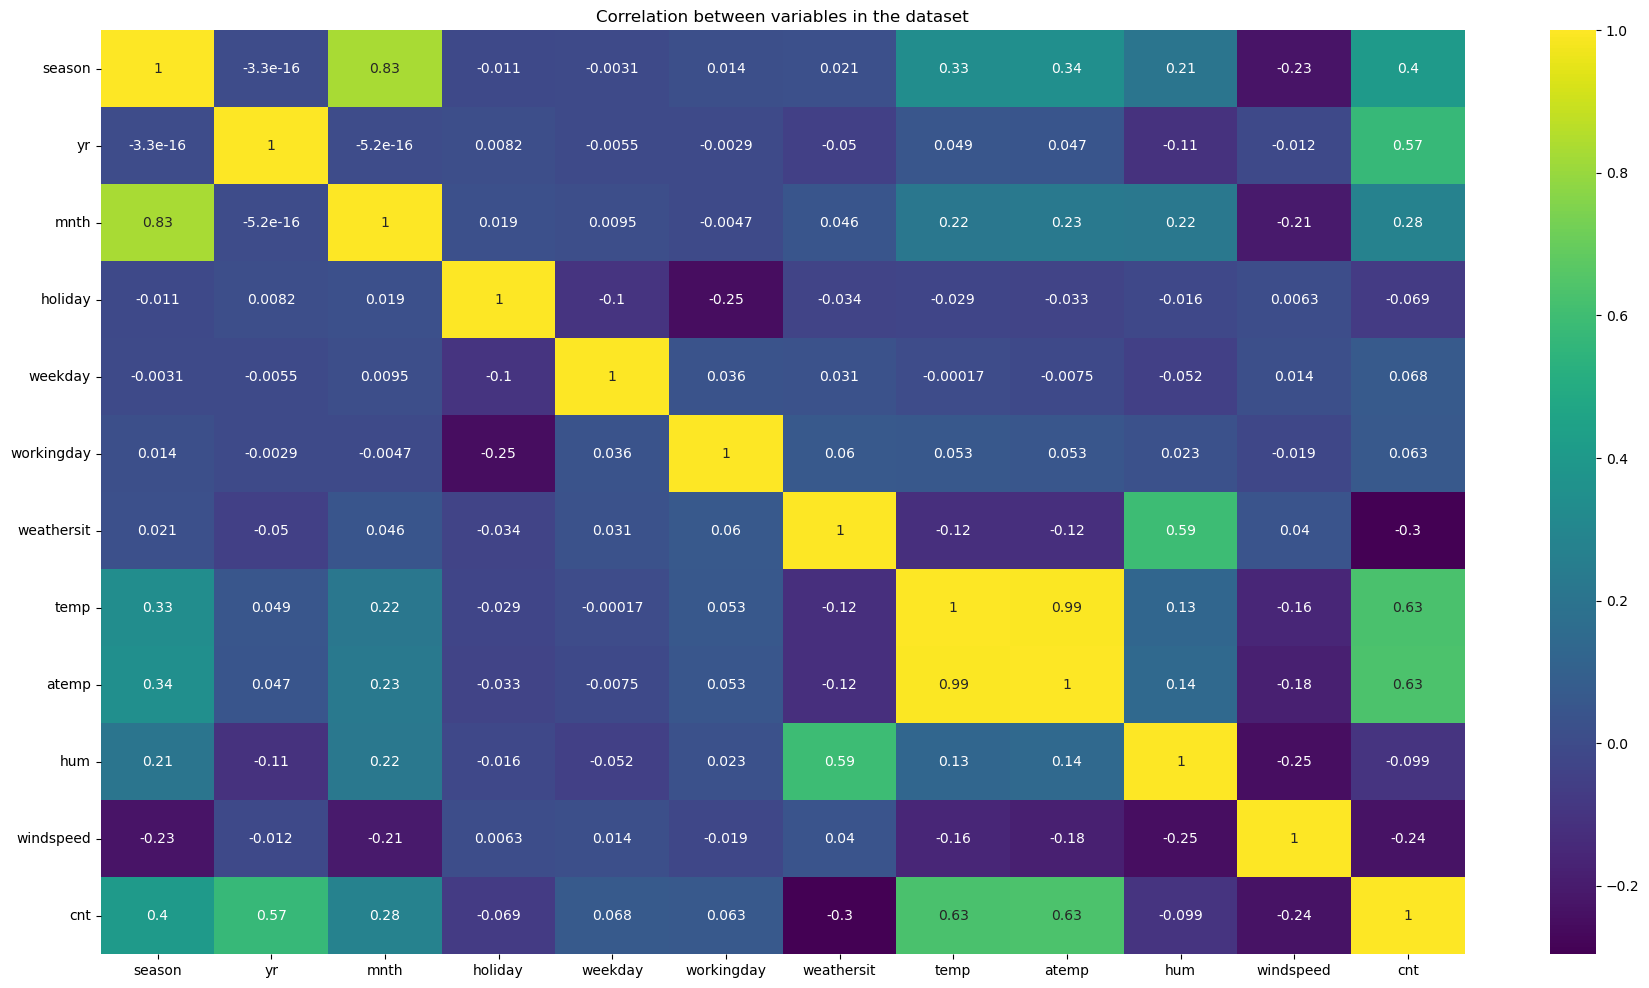

In [647]:
#making a heatmap to understand correlation between the variables.

plt.figure(figsize=(22, 12))
sns.heatmap(boom_bike.corr(), cmap='viridis', annot=True)
plt.title('Correlation between variables in the dataset')
plt.show()

In [648]:
#Mapping the categorical values.(reference data dictionary)

In [649]:
boom_bike['season']=boom_bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
boom_bike['mnth']=boom_bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
boom_bike['weathersit']=boom_bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
boom_bike['weekday']=boom_bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
boom_bike['yr']=boom_bike.yr.map({0:2018,1:2019})

In [650]:
boom_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [651]:
#Creating Dummy Variables:- for those variables whose sublevels are greator than 2.

# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy = boom_bike[['season','mnth','weekday','weathersit']]

In [652]:

dummy = pd.get_dummies(dummy,drop_first=True)

# Convert each column in the dummy DataFrame to integers
for col in dummy.columns:
    dummy[col] = dummy[col].astype(int)

In [653]:
# Adding the dummy variables to the main dataset
boom_bike = pd.concat([dummy,boom_bike],axis = 1)

In [654]:
boom_bike.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy', 'season', 'yr', 'mnth', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt'],
      dtype='object')

In [655]:
#Deleting the orginal columns season.weathersit,weekday,mnth

boom_bike.drop(['season', 'weathersit', 'weekday', 'mnth'],axis=1,inplace=True)

In [656]:

boom_bike.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,weathersit_Light Snow,weathersit_Mist + Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,2018,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [657]:
boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   season_spring             730 non-null    int32  
 1   season_summer             730 non-null    int32  
 2   season_winter             730 non-null    int32  
 3   mnth_Aug                  730 non-null    int32  
 4   mnth_Dec                  730 non-null    int32  
 5   mnth_Feb                  730 non-null    int32  
 6   mnth_Jan                  730 non-null    int32  
 7   mnth_July                 730 non-null    int32  
 8   mnth_June                 730 non-null    int32  
 9   mnth_Mar                  730 non-null    int32  
 10  mnth_May                  730 non-null    int32  
 11  mnth_Nov                  730 non-null    int32  
 12  mnth_Oct                  730 non-null    int32  
 13  mnth_Sep                  730 non-null    int32  
 14  weekday_Mo

In [658]:
#Data Preperation:- train-test data.

train_boombike, test_boombike = train_test_split(boom_bike, train_size = 0.7, test_size = 0.3, random_state = 100)


In [659]:
train_boombike.shape

(510, 30)

In [660]:
test_boombike.shape

(219, 30)

In [661]:
boom_bike.shape

(730, 30)

In [662]:
#Scaling the features

##We can see the diffence between values of columns are very hign for couple of columns so we will be scaling those column values. 
##So it is extremely important to rescale the variables so that they have a comparable scale. We will be using min-Max scaling logic here.

scaler = MinMaxScaler()


In [663]:
# Applying scaler() to all the columns except the 'dummy' variables.
vars_num = ['cnt','hum','windspeed','temp','atemp']

train_boombike[vars_num] = scaler.fit_transform(train_boombike[vars_num])

In [664]:
train_boombike.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,weathersit_Light Snow,weathersit_Mist + Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,2019,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,2019,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,2019,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,2019,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,2019,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


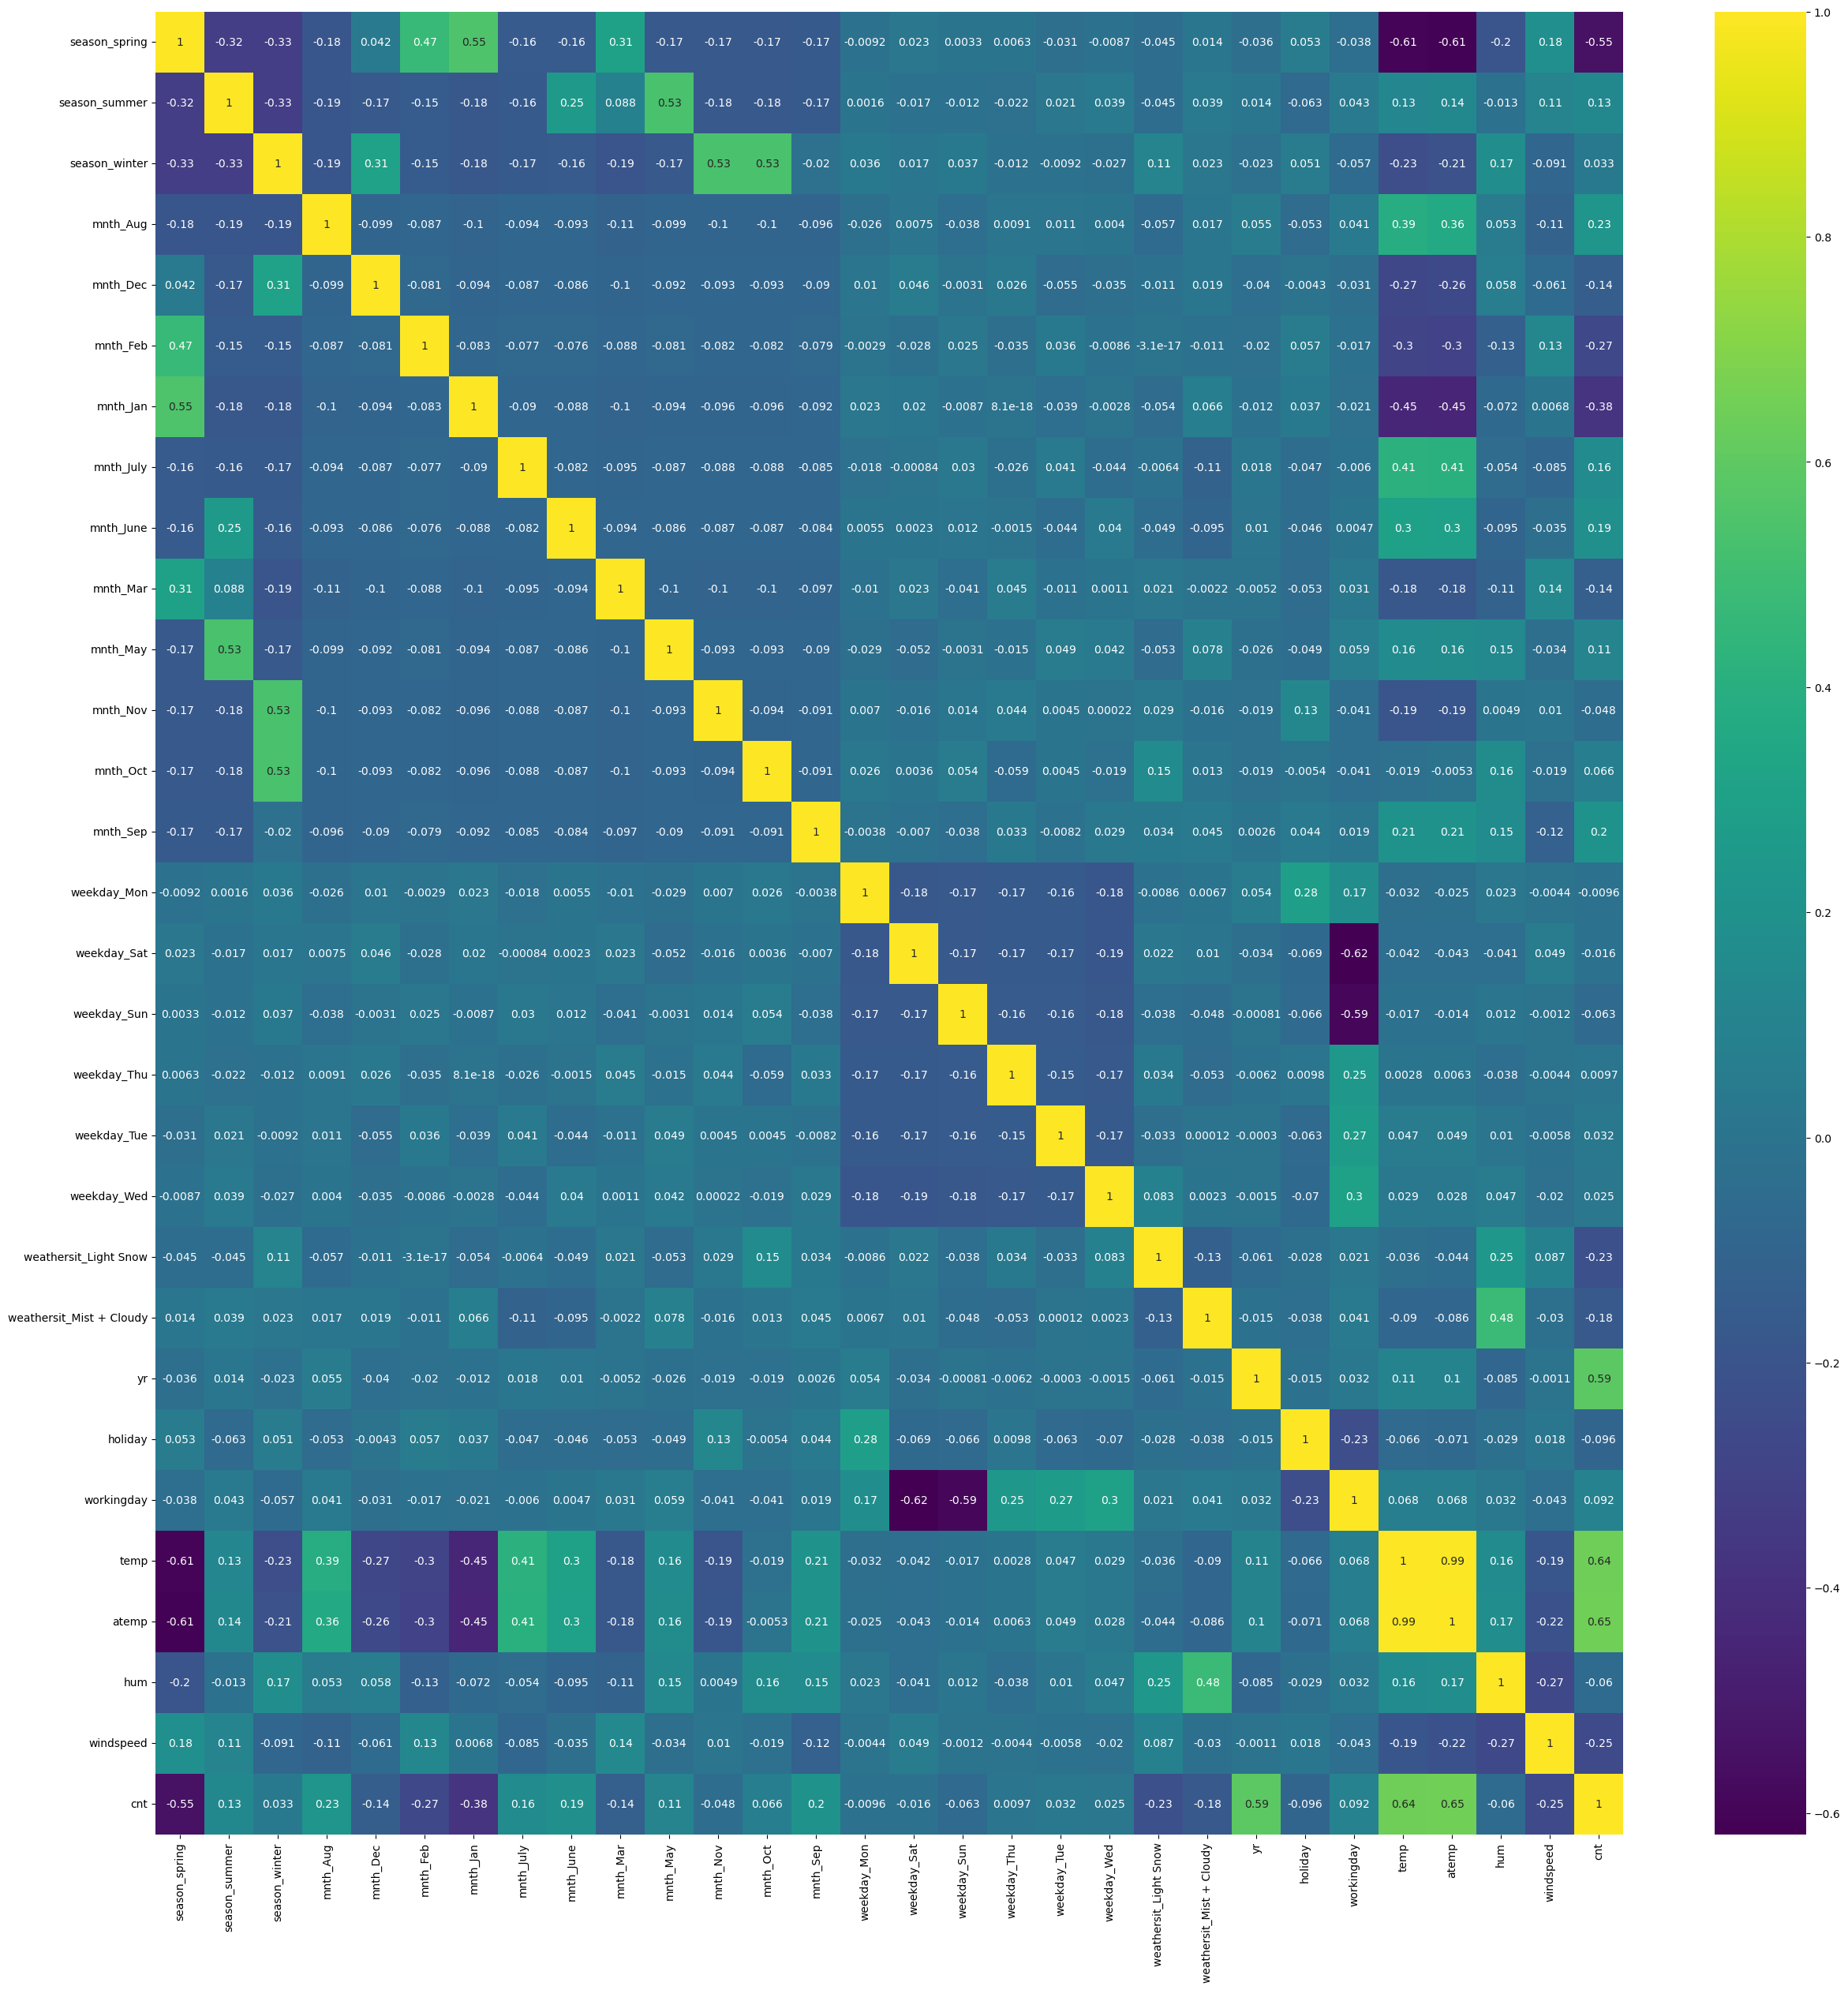

In [665]:
#plotting heatmap to check the coefficeints toidentify the correrelated variables.

plt.figure(figsize = (30, 30))
sns.heatmap(train_boombike.corr(), annot = True, cmap="viridis")
plt.show()

In [666]:
#We can see 'yr', 'temp','atemp has good correration with 'cnt'. we will taking all the variables for our model building.

#Dividing into X and Y sets for the model building

y_train_boombike = train_boombike.pop('cnt')
X_train_boombike = train_boombike


In [667]:
# We are using RFE approach for feature selection and then we will use the statsmodel approach for building the model(MIx approach)
##Taking 10 Variables first.


# Running RFE with variable equals to 10

lm = LinearRegression()
lm.fit(X_train_boombike, y_train_boombike)

rfe = RFE(lm, n_features_to_select = 10)
rfe = rfe.fit(X_train_boombike, y_train_boombike)


In [668]:
list(zip(X_train_boombike.columns, rfe.support_, rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 12),
 ('mnth_Dec', False, 8),
 ('mnth_Feb', False, 9),
 ('mnth_Jan', False, 6),
 ('mnth_July', True, 1),
 ('mnth_June', False, 18),
 ('mnth_Mar', False, 19),
 ('mnth_May', False, 11),
 ('mnth_Nov', False, 7),
 ('mnth_Oct', False, 16),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 14),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 13),
 ('weekday_Thu', False, 17),
 ('weekday_Tue', False, 15),
 ('weekday_Wed', False, 20),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', False, 2),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [669]:
colms = X_train_boombike.columns[rfe.support_]
colms

Index(['season_spring', 'season_winter', 'mnth_July', 'mnth_Sep',
       'weathersit_Light Snow', 'yr', 'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [670]:
X_train_boombike.columns[~rfe.support_]

Index(['season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Mist + Cloudy', 'workingday',
       'atemp'],
      dtype='object')

In [671]:
#using Stats Model:-

# Creating X_train dataframe with RFE selected variables

X_train_boombike_rfe = X_train_boombike[colms]

In [672]:
#Adding a constant variable

X_train_boombike_lm = sm.add_constant(X_train_boombike_rfe)

In [673]:
X_train_boombike_lm.head()

,const,season_spring,season_winter,mnth_July,mnth_Sep,weathersit_Light Snow,yr,holiday,temp,hum,windspeed
653,1.0,0,1,0,0,0,2019,0,0.509887,0.575354,0.300794
576,1.0,0,0,1,0,0,2019,0,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,2019,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,2019,0,0.245101,0.498067,0.663106
482,1.0,0,0,0,0,0,2019,0,0.395666,0.504508,0.188475


In [674]:
#The first linear models using statsmodels

lm_1 = sm.OLS(y_train_boombike, X_train_boombike_lm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.53e-184
Time:                        11:26:04   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -459.8296     16.985    -27.073      0.000    -493.200    -426.459
season_spring            -0.1005      0.015     -6.536      0.000      -0.131      -0.070
season_winter             0.0653      0.013      5.153      0.000       0.040       0.090
mnth_July                -0.0805      0.018     -4.538      0.000      -0.115      -0.046
mnth_Sep                  0.0598      0.016      3.723      0.000       0.028       0.091
weathersit_Light Snow    -0.1980      0.026     -7.659      0.000      -0.249      -0.147
yr                        0.2281      0.008     27.102      0.000       0.212       0.245
holiday                  -0.0920      0.026     -3.472      0.001      -0.144      -0.040
temp                      0.5147      0.031     16.542      0.000       0.454       0.576
hum                      -0.2728      0.032     -8.542      0.000      -0.336      -0.210
windspeed                -0.1887      0.026     -7.194      0.000      -0.240      -0.137
==============================================================================
Omnibus:                       51.023   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.492
Skew:                          -0.593   Prob(JB):                     1.51e-22
Kurtosis:                       4.823   Cond. No.                     8.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [675]:
# All P values for variables are less than 0.05, and now checking VIF.

# Calculating the VIFs.

vif = pd.DataFrame()
vif['Features'] = X_train_boombike_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_boombike_rfe.values, i), 2) for i in range(X_train_boombike_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
5,yr,55.22
8,hum,26.10
7,temp,18.82
9,windspeed,5.27
0,season_spring,3.34
1,season_winter,2.32
2,mnth_July,1.40
3,mnth_Sep,1.20
4,weathersit_Light Snow,1.14
6,holiday,1.04


In [676]:
# we noticed that VIF of Yr is 83.86 , so once we tryied to remove this it is impacting R squared very much, so will ignore that and try to remove 2nd varible i.e 'hum'.

X_train_boombike_rfe = X_train_boombike_rfe.drop(['hum'], axis=1)


In [677]:
#2nd Model.

X_train_boombike_lm = sm.add_constant(X_train_boombike_rfe)
lm_2 = sm.OLS(y_train_boombike, X_train_boombike_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          5.33e-171
Time:                        11:26:04   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -474.0108     18.079    -26.219      0.000    -509.531    -438.490
season_spring            -0.1032      0.016     -6.274      0.000      -0.136      -0.071
season_winter             0.0504      0.013      3.754      0.000       0.024       0.077
mnth_July                -0.0616      0.019     -3.272      0.001      -0.099      -0.025
mnth_Sep                  0.0498      0.017      2.911      0.004       0.016       0.083
weathersit_Light Snow    -0.2562      0.027     -9.608      0.000      -0.309      -0.204
yr                        0.2350      0.009     26.233      0.000       0.217       0.253
holiday                  -0.0862      0.028     -3.041      0.002      -0.142      -0.030
temp                      0.4758      0.033     14.453      0.000       0.411       0.540
windspeed                -0.1325      0.027     -4.879      0.000      -0.186      -0.079
==============================================================================
Omnibus:                       62.894   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.633
Skew:                          -0.736   Prob(JB):                     4.71e-26
Kurtosis:                       4.823   Cond. No.                     8.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [678]:
# Again Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_boombike_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_boombike_rfe.values, i), 2) for i in range(X_train_boombike_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
5,yr,32.10
7,temp,18.47
8,windspeed,4.93
0,season_spring,3.34
1,season_winter,2.28
2,mnth_July,1.38
3,mnth_Sep,1.20
4,weathersit_Light Snow,1.06
6,holiday,1.04


In [726]:
# 3rd Model.
# We noticed that Temp has hign VIF so will remove that variable.

X_train_boombike_rfe = X_train_boombike_rfe.drop(['temp'], axis=1)


In [728]:
X_train_boombike_lm = sm.add_constant(X_train_boombike_rfe)
lm_2 = sm.OLS(y_train_boombike, X_train_boombike_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     163.5
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          2.22e-134
Time:                        11:29:31   Log-Likelihood:                 365.87
No. Observations:                 510   AIC:                            -713.7
Df Residuals:                     501   BIC:                            -675.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -503.3148     21.370    -23.553      0.000    -545.300    -461.330
season_spring            -0.2713      0.014    -19.606      0.000      -0.298      -0.244
season_winter            -0.0527      0.014     -3.901      0.000      -0.079      -0.026
mnth_July                 0.0339      0.021      1.616      0.107      -0.007       0.075
mnth_Sep                  0.0886      0.020      4.406      0.000       0.049       0.128
weathersit_Light Snow    -0.2626      0.032     -8.279      0.000      -0.325      -0.200
yr                        0.2497      0.011     23.583      0.000       0.229       0.270
holiday                  -0.0866      0.034     -2.570      0.010      -0.153      -0.020
windspeed                -0.1771      0.032     -5.519      0.000      -0.240      -0.114
==============================================================================
Omnibus:                       31.890   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.391
Skew:                          -0.484   Prob(JB):                     8.44e-11
Kurtosis:                       4.117   Cond. No.                     8.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [730]:
#calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train_boombike_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_boombike_rfe.values, i), 2) for i in range(X_train_boombike_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
5,yr,6.49
7,windspeed,4.87
0,season_spring,1.67
1,season_winter,1.63
2,mnth_July,1.21
3,mnth_Sep,1.17
4,weathersit_Light Snow,1.06
6,holiday,1.04


In [732]:
# We noticed that mnth_july has high P value so we are removing that variable as well.



X_train_boombike_rfe = X_train_boombike_rfe.drop(['mnth_July'], axis=1)

In [734]:
X_train_boombike_lm = sm.add_constant(X_train_boombike_rfe)
lm_2 = sm.OLS(y_train_boombike, X_train_boombike_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     185.8
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          5.74e-135
Time:                        11:33:08   Log-Likelihood:                 364.54
No. Observations:                 510   AIC:                            -713.1
Df Residuals:                     502   BIC:                            -679.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -503.4527     21.404    -23.522      0.000    -545.505    -461.400
season_spring            -0.2767      0.013    -20.565      0.000      -0.303      -0.250
season_winter            -0.0582      0.013     -4.438      0.000      -0.084      -0.032
mnth_Sep                  0.0839      0.020      4.208      0.000       0.045       0.123
weathersit_Light Snow    -0.2613      0.032     -8.228      0.000      -0.324      -0.199
yr                        0.2497      0.011     23.553      0.000       0.229       0.271
holiday                  -0.0873      0.034     -2.585      0.010      -0.154      -0.021
windspeed                -0.1815      0.032     -5.666      0.000      -0.244      -0.119
==============================================================================
Omnibus:                       33.805   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.316
Skew:                          -0.506   Prob(JB):                     1.95e-11
Kurtosis:                       4.139   Cond. No.                     8.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [736]:
#calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train_boombike_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_boombike_rfe.values, i), 2) for i in range(X_train_boombike_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
4,yr,5.81
6,windspeed,4.84
0,season_spring,1.57
1,season_winter,1.53
2,mnth_Sep,1.14
3,weathersit_Light Snow,1.06
5,holiday,1.04


In [738]:
# Now will remove 'windspeed' as it has hign 'VIF' apart from 'yr'.


X_train_boombike_rfe = X_train_boombike_rfe.drop(['windspeed'], axis=1)


In [740]:
X_train_boombike_lm = sm.add_constant(X_train_boombike_rfe)
lm_2 = sm.OLS(y_train_boombike, X_train_boombike_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     199.2
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          2.10e-129
Time:                        11:38:58   Log-Likelihood:                 348.74
No. Observations:                 510   AIC:                            -683.5
Df Residuals:                     503   BIC:                            -653.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -502.2741     22.055    -22.774      0.000    -545.605    -458.943
season_spring            -0.2873      0.014    -20.935      0.000      -0.314      -0.260
season_winter            -0.0541      0.013     -4.013      0.000      -0.081      -0.028
mnth_Sep                  0.0955      0.020      4.673      0.000       0.055       0.136
weathersit_Light Snow    -0.2804      0.033     -8.616      0.000      -0.344      -0.216
yr                        0.2491      0.011     22.802      0.000       0.228       0.271
holiday                  -0.0912      0.035     -2.622      0.009      -0.160      -0.023
==============================================================================
Omnibus:                       42.031   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.696
Skew:                          -0.565   Prob(JB):                     2.00e-15
Kurtosis:                       4.381   Cond. No.                     8.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [742]:
#calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train_boombike_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_boombike_rfe.values, i), 2) for i in range(X_train_boombike_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
4,yr,2.20
0,season_spring,1.54
1,season_winter,1.53
2,mnth_Sep,1.13
3,weathersit_Light Snow,1.05
5,holiday,1.04


In [ ]:
#This is our final model as we saw that , all Variables VIF and P value are in expected range now.


In [744]:
#Residual Analysis of the train data

y_train_boombike_pred = lm_2.predict(X_train_boombike_lm)

C:\Users\MS422\AppData\Local\Temp\ipykernel_28552\2383551661.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train_boombike - y_train_boombike_pred), bins = 20)


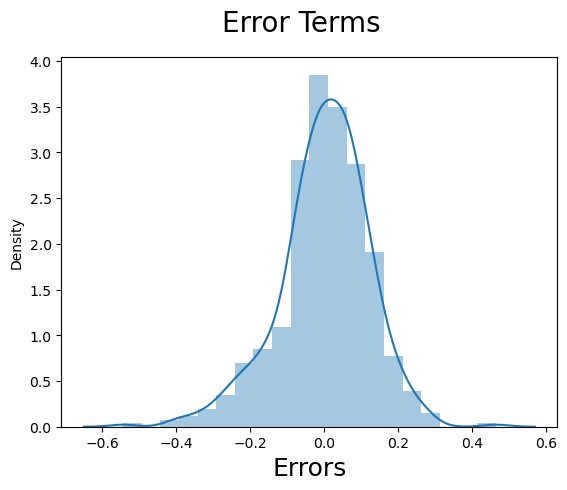

In [752]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_boombike - y_train_boombike_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

In [ ]:
# We saw that the errors are centred around 0 and follows a normal distribution.


In [758]:
# Using the Final Model for prediction.
# Scaling of test data

num_vars = ['cnt','hum','windspeed','temp','atemp']

test_boombike[num_vars] = scaler.transform(test_boombike[num_vars])

In [762]:
test_boombike.describe()


,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,weathersit_Light Snow,weathersit_Mist + Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,2018.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2018.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2018.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2018.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,2019.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2019.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [766]:
#Dividing into X_test and y_test

y_test_boombike = test_boombike.pop('cnt')
X_test_boombike = test_boombike

In [768]:
# Addition of constant variable to test 

X_test_boombike = sm.add_constant(X_test_boombike)

In [770]:
# Using values used by final model for predictions


test_boombike_col = X_train_boombike_lm.columns
X_test_boombike=X_test_boombike[test_boombike_col[1:]]
# Adding constant variable to test dataframe
X_test_boombike = sm.add_constant(X_test_boombike)

X_test_boombike.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   season_spring          219 non-null    int32  
 2   season_winter          219 non-null    int32  
 3   mnth_Sep               219 non-null    int32  
 4   weathersit_Light Snow  219 non-null    int32  
 5   yr                     219 non-null    int64  
 6   holiday                219 non-null    int64  
dtypes: float64(1), int32(4), int64(2)
memory usage: 10.3 KB


In [772]:
# Making predictions using the final model

y_pred = lm_2.predict(X_test_boombike)

In [778]:
#Calculating the r-squared

r2_score(y_test_boombike, y_pred)

0.7194859139721803

In [ ]:
#We can see that the r_squared on the test set is 0.72 and the r-squared on the train set 0.70 which is quiet reasonable and nearly equal, 
# which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

In [790]:
#Model Evaluation

#Getting the variable names and the coefficient values for the final equation of the best fitted line.

param = pd.DataFrame(lm_2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,7))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
5,yr,0.249132
3,mnth_Sep,0.095462
2,season_winter,-0.054144
6,holiday,-0.091180
4,weathersit_Light Snow,-0.280373
1,season_spring,-0.287344
0,const,-502.274067


In [ ]:
# Final Equation:-

cnt=-502.27+0.249*yr+0.095*mnth_sep-0.05*season_winter-0.091*holiday-0.280*weathersit_LightSNow-0.287*season_spring


Positive coefficent will be directly impacting cnt , whereas negative will inversely impact the cnt value.

In [ ]:
#Recommendations for the Company:-

# 1.The month of Sep has the higest demand.
# 2.With increase in year count the demand will be getting increased.
